In [2]:
from IPython.core.interactiveshell import InteractiveShell # 모든 명령어 출력
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML # 화면 좌우 크기 100%
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings # 파이썬 버전에 따른 오류 출력 방지
warnings.filterwarnings('ignore')

import pandas as pd # pandas
import numpy as np # numphy
import matplotlib.pyplot as plt # 시각화 matplob
import seaborn as sns; sns.set() # 시각화 seaborn
get_ipython().run_line_magic('matplotlib', 'inline') # 시각화 그림 자동 화면 출력
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 표시
plt.rcParams['axes.unicode_minus'] = False  #한글 폰트 사용시 마이너스 폰트 깨짐 해결

In [3]:
data = pd.read_pickle('../../pkl/df_filtered-01.pkl').sample(frac=0.1)
data.head()
data.shape

,품목명,용도명,제조국(원산지),과세가격($/Kg),유기식품 여부,영유아섭취대상,주문자상표부착,유전자변형식품,가온보존대상,진균수시험대상,방사선조사식품,판정결과,순중량(Kg)_log,과세가격_log
28565,과자(스낵과자),판매용,일본,13.285,아니오,아니오,아니오,표시함,N,N,N,0,6.927558,9.514216
293060,기타가공품,판매용,중국,0.787,아니오,아니오,아니오,해당없음,N,Y,N,0,9.835615,9.596541
112691,초콜릿가공품,판매용,이탈리아,14.797,아니오,아니오,아니오,해당없음,N,N,N,0,5.370824,8.065265
208168,과실주,판매용,프랑스,4.885,아니오,아니오,아니오,해당없음,N,N,N,0,5.842152,7.428333
87302,식염절임,판매용,라오스,2.500,아니오,아니오,아니오,해당없음,N,N,N,0,9.968151,10.884442


(36638, 14)

In [4]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

numeric_features = data.drop(['판정결과'], axis=1).select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.drop(['판정결과'], axis=1).select_dtypes(include=['object', 'category']).columns

X = data.drop('판정결과', axis=1)
y = data['판정결과']

le = preprocessing.LabelEncoder()
label_encoder = le.fit(y)
y = label_encoder.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier)
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier)
import lightgbm
import xgboost as xgb
# ensemble method in which each tree of the forest will be provided a balanced bootstrap sample
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

import category_encoders as ce

from sklearn.metrics import f1_score, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, average_precision_score
from sklearn.metrics import log_loss, brier_score_loss, matthews_corrcoef
from sklearn.model_selection import KFold, RandomizedSearchCV

import scikitplot as skplt 
from tqdm import tqdm_notebook

In [6]:
classifiers = {}
# precision
classifiers.update({'XGB': xgb.XGBRFClassifier()})
classifiers.update({'GNB': GaussianNB()})
classifiers.update({'RForest': RandomForestClassifier(n_estimators=200)})

# Loss function
classifiers.update({'LGR': LogisticRegression(class_weight='balanced')})
classifiers.update({'Bagging': BaggingClassifier(DecisionTreeClassifier(),  n_estimators=100)})
classifiers.update({'RForest_balance': RandomForestClassifier(class_weight='balanced', n_estimators=100)})

# recall 
classifiers.update({'BRF': BalancedRandomForestClassifier(n_estimators=100)})

  0%|          | 0/7 [00:00<?, ?it/s]

XGB
[11:43:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.4971522678926782
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7245
           1       0.00      0.00      0.00        83

    accuracy                           0.99      7328
   macro avg       0.49      0.50      0.50      7328
weighted avg       0.98      0.99      0.98      7328

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

GNB
0.49611838956105603
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      7245
           1       0.02      0.07      0.03        83

    accuracy                           0.94      7328
   macro avg       0.50      0.51      0.50      7328
weighted avg       0.98      0.94      0.96      7328

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

RForest
0.5195543567382948
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7245
           1       0.33      0.02      0.04        83

    accuracy                           0.99      7328
   macro avg       0.66      0.51      0.52      7328
weighted avg       0.98      0.99      0.98      7328

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

LGR
0.45661172457821303
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      7245
           1       0.03      0.80      0.06        83

    accuracy                           0.74      7328
   macro avg       0.52      0.77      0.46      7328
weighted avg       0.99      0.74      0.84      7328

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

Bagging
0.5192701420354859
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7245
           1       0.29      0.02      0.04        83

    accuracy                           0.99      7328
   macro avg       0.64      0.51      0.52      7328
weighted avg       0.98      0.99      0.98      7328

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

RForest_balance
0.5179278461933282
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7245
           1       0.17      0.02      0.04        83

    accuracy                           0.99      7328
   macro avg       0.58      0.51      0.52      7328
weighted avg       0.98      0.99      0.98      7328

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

BRF
0.4600284296871785
              precision    recall  f1-score   support

           0       1.00      0.75      0.85      7245
           1       0.04      0.81      0.07        83

    accuracy                           0.75      7328
   macro avg       0.52      0.78      0.46      7328
weighted avg       0.99      0.75      0.84      7328

****************************************************************************************************


<Figure size 1080x288 with 0 Axes>

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

<AxesSubplot:title={'center':'Calibration plots (Reliability Curves)'}, xlabel='Mean predicted value', ylabel='Fraction of positives'>

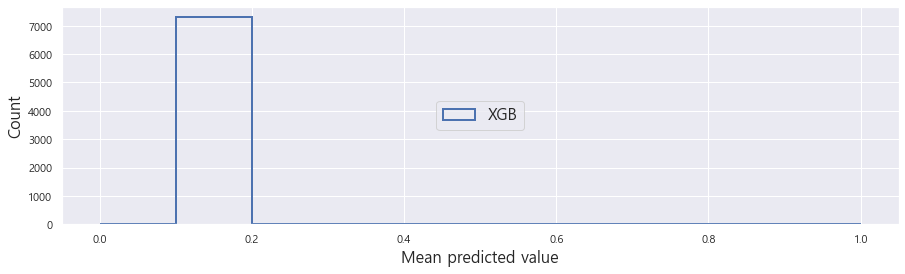

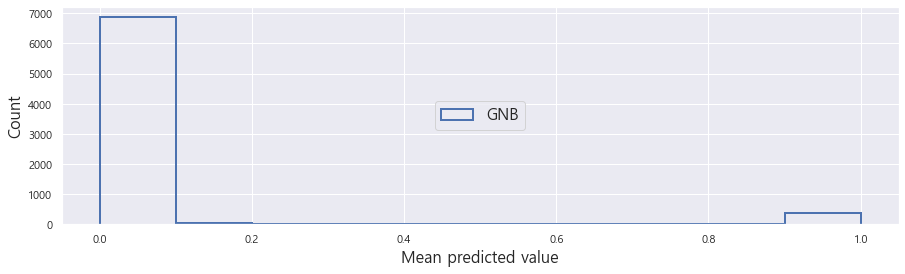

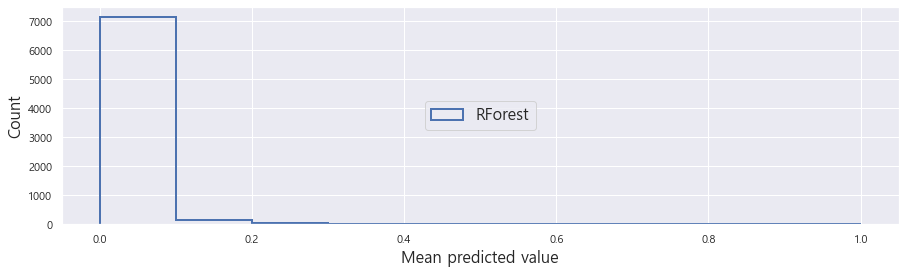

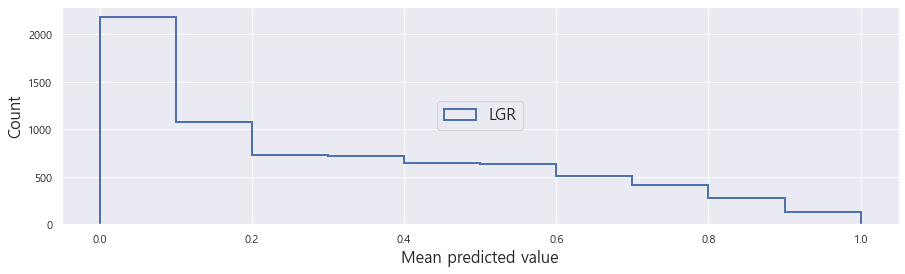

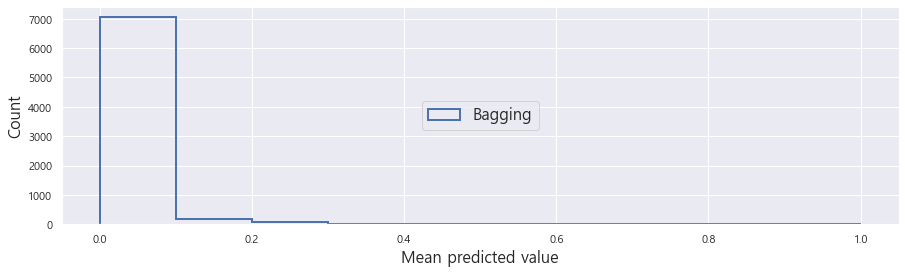

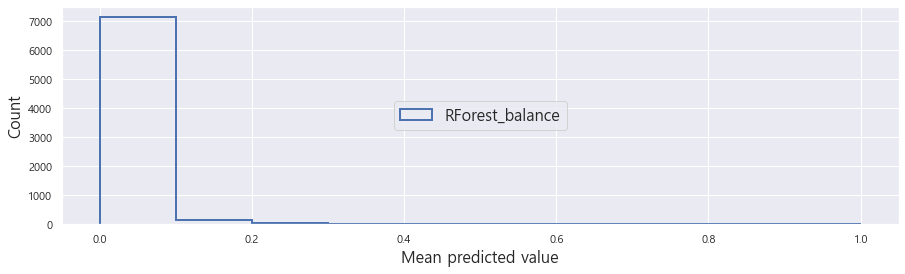

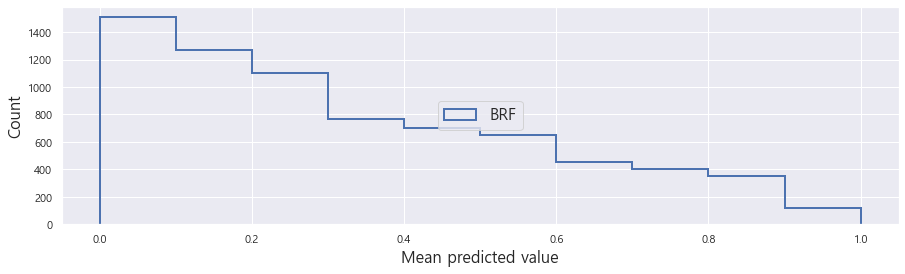

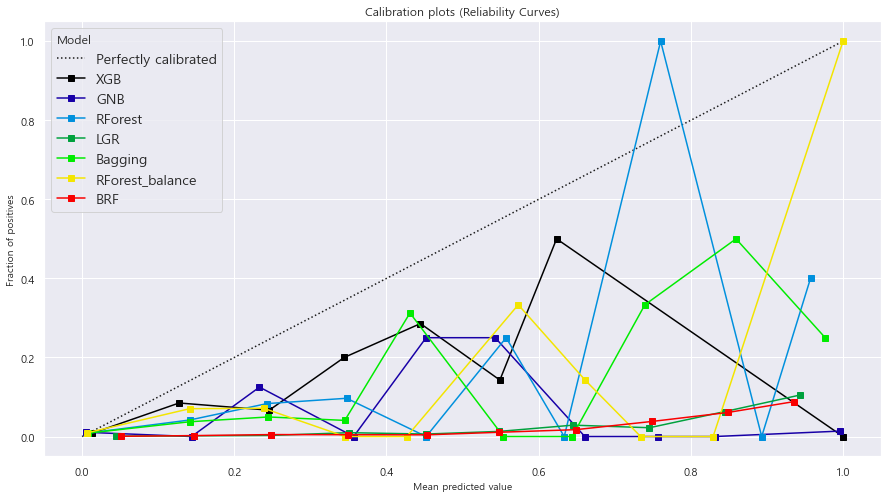

In [7]:
kf = KFold(n_splits=5)
classifier_labels = []
probas_list = []
for classifier_label, classifier in tqdm_notebook(classifiers.items()):
    #param_grid = parameters[classifier_label]
    param_grid = {}
    print(classifier_label)
    numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
    categorical_transformer = Pipeline(steps=[('catencoder', ce.woe.WOEEncoder())])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])
    
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)])
    
    grid = RandomizedSearchCV(pipe, param_grid, cv = kf,  
                              n_jobs= -1,
                              scoring = 'recall') 
    
    model = grid.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print(f1_score(y_test, y_pred, average='macro'))
    print(classification_report(y_test, y_pred))
    print('*'*100)
    
    
    # ccalibration curve
    y_proba = model.predict_proba(X_test)
    probas_list.append(y_proba)
    classifier_labels.append(classifier_label)
    
    # 예측확률분포
    plt.figure(figsize=(15,4))
    ax = plt.hist(y_proba[:,1], range=(0, 1), bins=10, label=classifier_label, histtype="step", lw=2)
    plt.xlabel("Mean predicted value", fontsize=16); plt.ylabel("Count",fontsize=16)
    plt.legend(fontsize=16, loc='center' )

skplt.metrics.plot_calibration_curve(y_test, probas_list, classifier_labels, figsize=(15,8))
leg = plt.legend(title='Model', fontsize = 14)
leg._legend_box.align = 'left'

## Stacking classifier

In [11]:
from sklearn.model_selection import cross_val_score

numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
categorical_transformer = Pipeline(steps=[('catencoder', ce.woe.WOEEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

from sklearn.ensemble import StackingClassifier 

estimators= [(i, k) for i,k in classifiers.items()]
estimators= estimators[1:10]

meta = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()) 

pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('stacking_model', meta)])
grid_meta = RandomizedSearchCV(pipe, param_grid, cv = kf,  
                              n_jobs= -1,
                              scoring = 'recall')

scores = cross_val_score(grid_meta, X_train, y_train, cv=3)
y_predict = grid_meta.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7245
           1       0.00      0.00      0.00        83

    accuracy                           0.99      7328
   macro avg       0.49      0.50      0.50      7328
weighted avg       0.98      0.99      0.98      7328



In [27]:
classifiers = {}
# precision
#classifiers.update({'XGB': xgb.XGBRFClassifier()})
#classifiers.update({'GNB': GaussianNB()})
classifiers.update({'RForest': RandomForestClassifier(n_estimators=200)})

# Loss function
classifiers.update({'LGR': LogisticRegression(class_weight='balanced')})
#classifiers.update({'Bagging': BaggingClassifier(DecisionTreeClassifier(),  n_estimators=100)})
#classifiers.update({'RForest_balance': RandomForestClassifier(class_weight='balanced', n_estimators=100)})

# recall 
classifiers.update({'BRF': BalancedRandomForestClassifier(n_estimators=100)})


estimators= [(i, k) for i,k in classifiers.items()]
estimators

[('RForest', RandomForestClassifier(n_estimators=200)),
 ('LGR', LogisticRegression(class_weight='balanced')),
 ('BRF', BalancedRandomForestClassifier())]

## Voting Classifier
### Randomgridsearch를 위해 get.parameters 이름을 잘 적시해야한다.
### pipe로 무작위서치하기 떄문에

In [60]:
voters.get_params().keys()

dict_keys(['estimators', 'flatten_transform', 'n_jobs', 'verbose', 'voting', 'weights', 'RForest', 'LGR', 'BRF', 'RForest__bootstrap', 'RForest__ccp_alpha', 'RForest__class_weight', 'RForest__criterion', 'RForest__max_depth', 'RForest__max_features', 'RForest__max_leaf_nodes', 'RForest__max_samples', 'RForest__min_impurity_decrease', 'RForest__min_impurity_split', 'RForest__min_samples_leaf', 'RForest__min_samples_split', 'RForest__min_weight_fraction_leaf', 'RForest__n_estimators', 'RForest__n_jobs', 'RForest__oob_score', 'RForest__random_state', 'RForest__verbose', 'RForest__warm_start', 'LGR__C', 'LGR__class_weight', 'LGR__dual', 'LGR__fit_intercept', 'LGR__intercept_scaling', 'LGR__l1_ratio', 'LGR__max_iter', 'LGR__multi_class', 'LGR__n_jobs', 'LGR__penalty', 'LGR__random_state', 'LGR__solver', 'LGR__tol', 'LGR__verbose', 'LGR__warm_start', 'BRF__bootstrap', 'BRF__ccp_alpha', 'BRF__class_weight', 'BRF__criterion', 'BRF__max_depth', 'BRF__max_features', 'BRF__max_leaf_nodes', 'BRF__

In [71]:
pipe.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('scaler', MinMaxScaler())]),
                                    Index(['과세가격($/Kg)', '순중량(Kg)_log', '과세가격_log'], dtype='object')),
                                   ('cat',
                                    Pipeline(steps=[('catencoder', WOEEncoder())]),
                                    Index(['품목명', '용도명', '제조국(원산지)', '유기식품 여부', '영유아섭취대상', '주문자상표부착', '유전자변형식품',
          '가온보존대상', '진균수시험대상', '방사선조사식품'],
         dtype='object'))])),
  ('stacking_model',
   VotingClassifier(estimators=[('RForest',
                                 RandomForestClassifier(n_estimators=200)),
                                ('LGR',
                                 LogisticRegression(class_weight='balanced')),
                                ('BRF', BalancedRandomForestClassifier())],
                    voting='soft'))],
 'verbose': False,
 'preprocessor': Colu

### precision 최대화

In [73]:
from sklearn.ensemble import VotingClassifier
from scipy.stats import randint


voters = VotingClassifier(estimators=estimators, voting='soft')

# https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_probas.html#sphx-glr-auto-examples-ensemble-plot-voting-probas-py
random_weights = [[np.random.random() for i in range(3)] for j in range(100)]

pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('stacking_model', voters)])

# hyperparamneters
param_distributions = {'stacking_model__RForest__criterion': ['gini', 'entropy'],
                       'stacking_model__LGR__penalty': ['l1', 'l2'], 
                       'stacking_model__weights' : random_weights}

grid_voters = RandomizedSearchCV(pipe, param_distributions, 
                                 cv = kf, 
                                 n_jobs= -1,
                                 n_iter = 30,
                                 scoring = 'precision')

scores = cross_val_score(grid_voters, X_train, y_train, cv=3)

y_predict = grid_voters.fit(X_train, y_train).predict(X_test)
y_probas = grid_voters.predict_proba(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7245
           1       0.21      0.06      0.09        83

    accuracy                           0.99      7328
   macro avg       0.60      0.53      0.54      7328
weighted avg       0.98      0.99      0.98      7328



### recall 최대화

In [74]:
from sklearn.ensemble import VotingClassifier
from scipy.stats import randint


voters = VotingClassifier(estimators=estimators, voting='soft')

# https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_probas.html#sphx-glr-auto-examples-ensemble-plot-voting-probas-py
random_weights = [[np.random.random() for i in range(3)] for j in range(100)]

pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('stacking_model', voters)])

# hyperparamneters
param_distributions = {'stacking_model__RForest__criterion': ['gini', 'entropy'],
                       'stacking_model__LGR__penalty': ['l1', 'l2'], 
                       'stacking_model__weights' : random_weights}

grid_voters = RandomizedSearchCV(pipe, param_distributions, 
                                 cv = kf, 
                                 n_jobs= -1,
                                 n_iter = 30,
                                 scoring = 'recall')

scores = cross_val_score(grid_voters, X_train, y_train, cv=3)

y_predict = grid_voters.fit(X_train, y_train).predict(X_test)
y_probas = grid_voters.predict_proba(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.75      0.85      7245
           1       0.03      0.78      0.07        83

    accuracy                           0.75      7328
   macro avg       0.52      0.77      0.46      7328
weighted avg       0.99      0.75      0.85      7328



(array([1681., 1237., 1000.,  863.,  606.,  584.,  475.,  448.,  339.,
          95.]),
 array([8.46358554e-04, 9.92505727e-02, 1.97654787e-01, 2.96059001e-01,
        3.94463215e-01, 4.92867429e-01, 5.91271643e-01, 6.89675857e-01,
        7.88080071e-01, 8.86484286e-01, 9.84888500e-01]),
 <BarContainer object of 10 artists>)

(array([  95.,  339.,  448.,  475.,  584.,  606.,  863., 1000., 1237.,
        1681.]),
 array([0.0151115 , 0.11351571, 0.21191993, 0.31032414, 0.40872836,
        0.50713257, 0.60553678, 0.703941  , 0.80234521, 0.90074943,
        0.99915364]),
 <BarContainer object of 10 artists>)

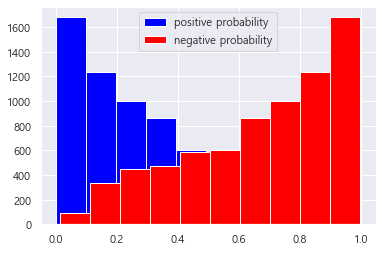

In [75]:
plt.hist(y_probas[:, 1], color ='blue', label='positive probability'); plt.legend()
plt.hist(y_probas[:, 0], color ='red', label='negative probability'); plt.legend()

In [26]:
def voting_function_predict(estimator):
    voters = VotingClassifier(estimators=estimator, voting='soft')

    pipe = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('stacking_model', voters)])

    grid_voters = RandomizedSearchCV(pipe, param_grid, cv = kf,  
                                  n_jobs= -1,
                                  scoring = 'recall')

    scores = cross_val_score(grid_voters, X_train, y_train, cv=3)

    y_predict = grid_voters.fit(X_train, y_train).predict(X_test)
    y_probas = grid_voters.predict_proba(X_test)

    print(classification_report(y_test, y_predict))

In [22]:
from itertools import combinations
estimators = estimators= [(i, k) for i,k in classifiers.items()]
estimators = estimators[1:10]

for comb in range(2, 7):
    print(f'{comb}개 Estimators')
    for estimator in combinations(estimators, comb):
        estimator
        voting_function_predict(estimator)
    print('*'*100)

2개 Estimators


(('LGR', LogisticRegression(class_weight='balanced')),
 ('BRF', BalancedRandomForestClassifier()))

              precision    recall  f1-score   support

           0       1.00      0.75      0.85      7245
           1       0.03      0.80      0.07        83

    accuracy                           0.75      7328
   macro avg       0.52      0.77      0.46      7328
weighted avg       0.99      0.75      0.85      7328

****************************************************************************************************
3개 Estimators
****************************************************************************************************
4개 Estimators
****************************************************************************************************
5개 Estimators
****************************************************************************************************
6개 Estimators
****************************************************************************************************


In [ ]:
from pycaret.classification import *
exp_name = setup(data = data, silent=True,
                 bin_numeric_features = ['순중량(Kg)_log', '과세가격_log'],
                 fix_imbalance = True,
                 target = '판정결과')

# train a few models
lr = create_model('lr', fold = 3)
dt = create_model('dt', fold = 3)
lightgbm = create_model('lightgbm', fold = 3)
rf = create_model('rf', fold = 3)
qda = create_model('qda', fold = 3)

# stack models
stacker = stack_models([lr, dt, knn, rf, qda], fold = 3)

In [16]:
evaluate_model(stacker)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [14]:
# train model
dt = create_model('dt',fold = 3)

# tune model
tuned_dt = tune_model(dt,fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9892,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9895,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9895,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9894,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
SD,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


# End